In [1]:
import tensorflow as tf
import numpy as np
from research.slim.nets.mobilenet import mobilenet_v2

from tensorflow.contrib import slim

In [ ]:
with tf.Session() as sess : 
    #sess.run(tf.get_variable('MobilenetV2/Conv/weights',reuse=True))
    #sess.run (tf.global_variables_initializer())
    saver = tf.train.Saver(tf.global_variables())
    ckpt = tf.train.latest_checkpoint('/home/minjun/Jupyter/My/mobilenet2/tensorflow_trained/mobilenet_v2_1.0_224.ckpt')
    
    print(ckpt)
    #saver.restore(sess, weight_dir)
    for layer in tf.trainable_variables():
        print("layer name : {} mean : {}".format(layer.name, sess.run(tf.reduce_mean(layer.eval(session=sess)))))

In [ ]:
from __future__ import print_function
from IPython import display 
checkpoint_name = 'mobilenet_v2_1.0_224' #@param
url = 'https://storage.googleapis.com/mobilenet_v2/checkpoints/' + checkpoint_name + '.tgz'
print('Downloading from ', url)
!wget {url}
print('Unpacking')
base_name = './'
!tar -xvf {base_name}.tgz
checkpoint = base_name + '.ckpt'

display.clear_output()
print('Successfully downloaded checkpoint from ', url,
      '. It is available as', checkpoint)

In [4]:
weight_decay=1e-5
images = tf.placeholder(dtype=tf.float32, shape=[None,512,512,3])
is_training = False

with slim.arg_scope(mobilenet_v2.training_scope(weight_decay=weight_decay,is_training=False)):
    logits, endpoints = mobilenet_v2.mobilenet_base(images)


In [9]:
checkpoint = '/home/minjun/Jupyter/ocr/EAST/trained_mobilnetv2/mobilenet_v2_1.0_224.ckpt'

#ema = tf.train.ExponentialMovingAverage(0.999)
#vars = ema.variables_to_restore()

saver = tf.train.Saver(tf.global_variables())

with tf.Session() as sess:
    saver.restore(sess,  checkpoint)
    for layer in tf.trainable_variables()[:10]:
        print("layer name : {} mean : {}".format(layer.name, sess.run(tf.reduce_mean(layer.eval(session=sess)))))
    sess.run(tf.global_variables_initializer())
    print('------------------')
    for layer in tf.trainable_variables()[:10]:
        print("layer name : {} mean : {}".format(layer.name, sess.run(tf.reduce_mean(layer.eval(session=sess)))))


INFO:tensorflow:Restoring parameters from /home/minjun/Jupyter/ocr/EAST/trained_mobilnetv2/mobilenet_v2_1.0_224.ckpt
layer name : MobilenetV2/Conv/weights:0 mean : -0.00510563887655735
layer name : MobilenetV2/Conv/BatchNorm/gamma:0 mean : 1.1679248809814453
layer name : MobilenetV2/Conv/BatchNorm/beta:0 mean : 0.8218730092048645
layer name : MobilenetV2/expanded_conv/depthwise/depthwise_weights:0 mean : -0.061735451221466064
layer name : MobilenetV2/expanded_conv/depthwise/BatchNorm/gamma:0 mean : 0.7364234924316406
layer name : MobilenetV2/expanded_conv/depthwise/BatchNorm/beta:0 mean : 1.0089302062988281
layer name : MobilenetV2/expanded_conv/project/weights:0 mean : -0.0013747788034379482
layer name : MobilenetV2/expanded_conv/project/BatchNorm/gamma:0 mean : 4.052672863006592
layer name : MobilenetV2/expanded_conv/project/BatchNorm/beta:0 mean : -0.0007627801969647408
layer name : MobilenetV2/expanded_conv_1/expand/weights:0 mean : 0.001830881810747087
------------------
layer nam

In [ ]:
checkpoint = '/home/minjun/Jupyter/ocr/EAST/trained_mobilnetv2/mobilenet_v2_1.0_224.ckpt'

ema = tf.train.ExponentialMovingAverage(0.999)
vars = tf.global_variables(scope='MobilenetV2')
vars = ema.variables_to_restore()

saver = tf.train.Saver(vars)

with tf.Session() as sess:
    saver.restore(sess,  checkpoint)
    for layer in tf.trainable_variables():
        print("layer name : {} mean : {}".format(layer.name, sess.run(tf.reduce_mean(layer.eval(session=sess)))))


In [ ]:
(1,2,3)*2

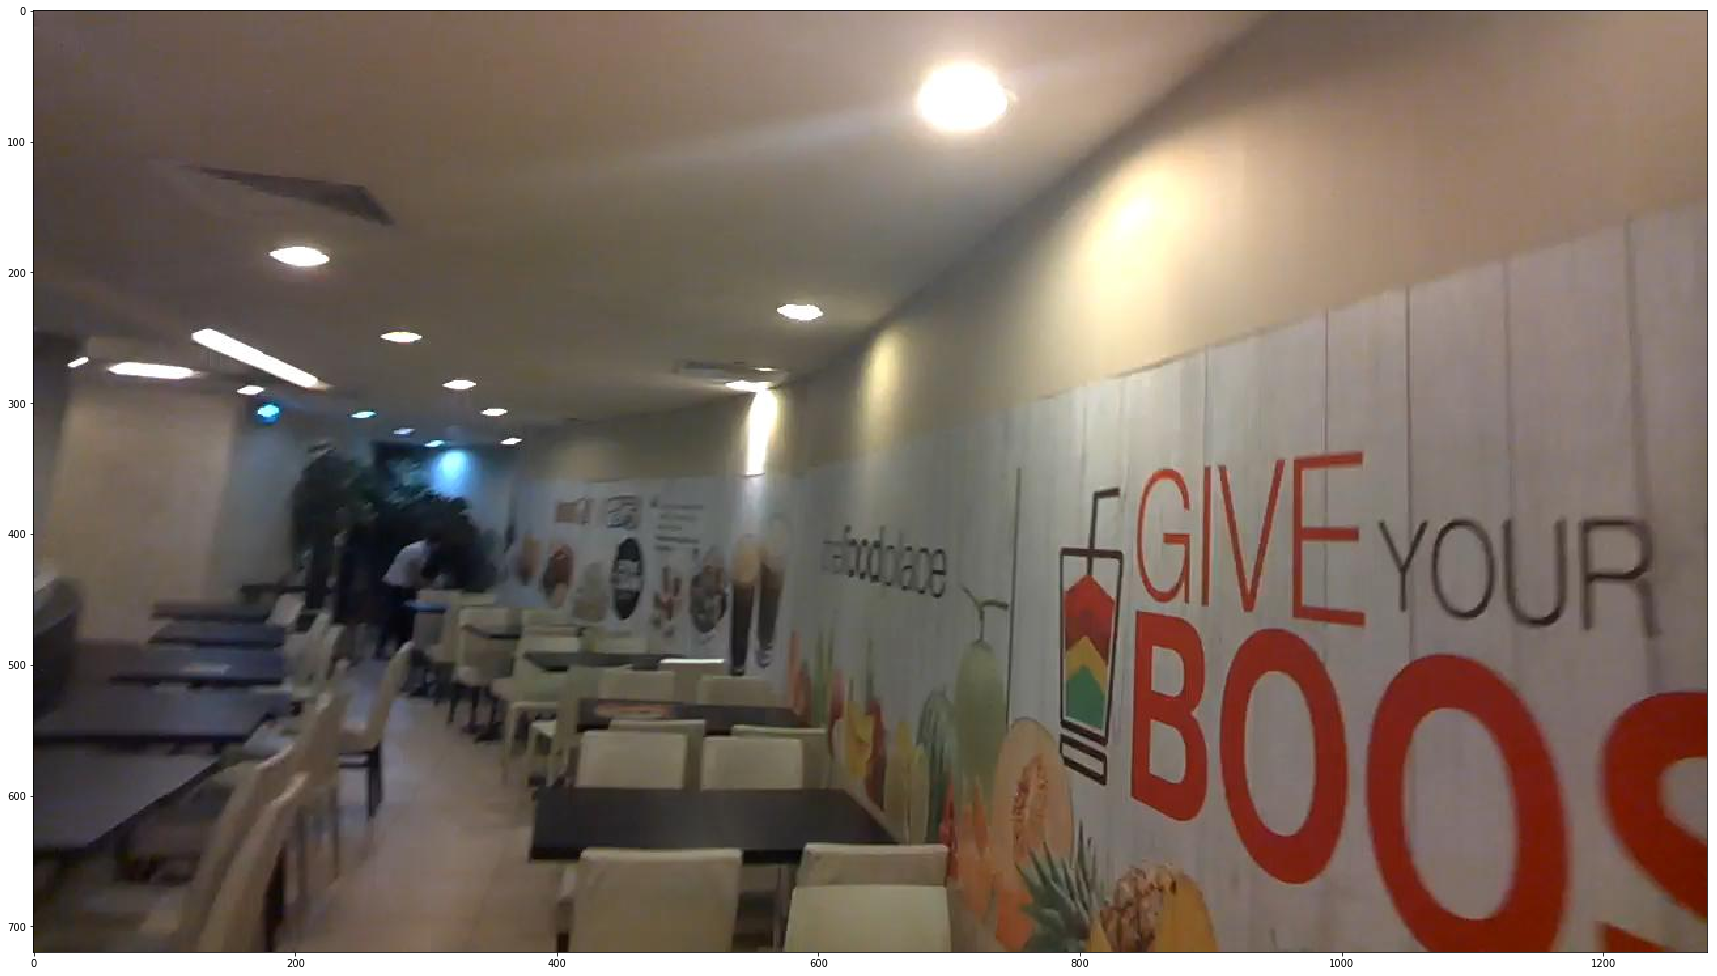

In [6]:
import matplotlib.pyplot as plt 
import cv2
im_fn = '/home/minjun/Jupyter/data/ocr/2015/test/img_143.jpg'
im = cv2.imread(im_fn)[:, :, ::-1]
fig, ax = plt.subplots(1,figsize=(30,30))
ax.imshow(im)